#Parcial python segundo corte
- Se eligió la base del rendimiento en lengua portuguesa, resolviendo el ejercicio por medio de regresión.

Realizado por Katalina Morales Dueñas 

C.C 1010078792

10 de Octubre del 2022

1.	Realice el proceso de verificación de calidad de datos y limpieza si es necesario realizarla. Mencione al final del punto, un resumen de los hallazgos encontrados.

##Importar librerias y base de datos

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/student-por.csv', 
                 sep = ';',
                 skip_blank_lines=True,
                 low_memory = False,
                 dtype={
                     'Medu': str,
                     'Fedu': str,
                     'traveltime': str,
                     'studytime': str,
                     'failures': str,
                     'famrel': str,
                     'freetime': str,
                     'goout': str,
                     'Dalc': str,
                     'Walc': str,
                     'health': str
                 })
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Dimensión de los datos

In [13]:
print('BASE RENDIMIENTO EN LENGUA PORTUGUESA')
print('Filas: ', df.shape[0])
print('Columnas: ', df.shape[1])

BASE RENDIMIENTO EN LENGUA PORTUGUESA
Filas:  649
Columnas:  33


Atributos y tipo de atributos

In [14]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu          object
Fedu          object
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime    object
studytime     object
failures      object
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel        object
freetime      object
goout         object
Dalc          object
Walc          object
health        object
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

##Análisis de datos faltantes y duplicados

In [15]:
for col in df.columns:
    num_missing = df[col].isnull().sum()
    pct_missing = np.mean(df[col].isnull())
    #print(col," - ",round(pct_missing*100, 2),"% - ",num_missing)
    print('{} - {}% - {}'.format(col,round(pct_missing*100, 2),num_missing))

school - 0.0% - 0
sex - 0.31% - 2
age - 0.0% - 0
address - 0.0% - 0
famsize - 0.31% - 2
Pstatus - 0.31% - 2
Medu - 0.0% - 0
Fedu - 0.0% - 0
Mjob - 0.0% - 0
Fjob - 0.15% - 1
reason - 0.0% - 0
guardian - 0.31% - 2
traveltime - 0.0% - 0
studytime - 0.0% - 0
failures - 0.0% - 0
schoolsup - 0.0% - 0
famsup - 0.31% - 2
paid - 0.0% - 0
activities - 0.0% - 0
nursery - 0.15% - 1
higher - 0.15% - 1
internet - 0.0% - 0
romantic - 0.0% - 0
famrel - 0.0% - 0
freetime - 0.0% - 0
goout - 0.0% - 0
Dalc - 0.0% - 0
Walc - 0.0% - 0
health - 0.0% - 0
absences - 0.0% - 0
G1 - 0.0% - 0
G2 - 0.0% - 0
G3 - 0.0% - 0


Antes de determinar alguna imputación o eliminación de dato faltante es necesario seleccionar primero las variables que se van a utilizar para el análisis. Por ahora, aquellas variables que presentan uno o más datos faltantes son: "higher", "nursery", "famsup", "guardian", "Fjob", "Pstatus",  "famsize" y "sex".

Datos duplicados

In [4]:
df.duplicated().sum() 

0

In [5]:
df_dedupped = df.drop_duplicates()
print(df.shape)
print(df_dedupped.shape)

(649, 33)
(649, 33)


No hay presencia de datos duplicados.

##Consistencia de los datos

In [19]:
df['school'].value_counts()

GP    423
MS    226
Name: school, dtype: int64

In [20]:
df['sex'].value_counts() #Total son 649 y hay 647 debido a los dos datos faltantes 

F    382
M    265
Name: sex, dtype: int64

In [21]:
df['famsize'].value_counts() #Total son 649 y hay 647 debido a los dos datos faltantes 

GT3    455
LE3    192
Name: famsize, dtype: int64

In [26]:
df['Pstatus'].value_counts() #No aparece en el diccionario el significado de "B"

T    567
A     79
B      1
Name: Pstatus, dtype: int64

In [29]:
df['Fjob'].value_counts()

other       367
services    180
at_home      42
teacher      36
health       23
Name: Fjob, dtype: int64

In [31]:
df['Medu'].value_counts() #La menor cantidad pertenece a cero, que no tienen ninguna educación

2    186
4    175
1    143
3    139
0      6
Name: Medu, dtype: int64

In [32]:
df['age'].describe()

count    649.000000
mean      16.744222
std        1.218138
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [33]:
df['absences'].describe()

count    649.000000
mean       3.659476
std        4.640759
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max       32.000000
Name: absences, dtype: float64

Puntuaciones comienzan en cero y terminan en 20 puntos.

In [35]:
df['G1'].describe() #Se evidencia una puntuacion maxima de 25 puntos cuando esta deberia ser menor o igual a 20.

count    649.000000
mean      11.414484
std        2.793153
min        0.000000
25%       10.000000
50%       11.000000
75%       13.000000
max       25.000000
Name: G1, dtype: float64

In [34]:
df['G2'].describe() 

count    649.000000
mean      11.570108
std        2.913639
min        0.000000
25%       10.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G2, dtype: float64

In [36]:
df['G3'].describe() #Se evidencia una puntuacion máxima de 36 puntos cuando esta deberia ser menor o igual a 20.

count    649.000000
mean      11.952234
std        3.358130
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       36.000000
Name: G3, dtype: float64

Las puntuaciones o el rendimiento de lengua portuguesa son muy similares en los tres cortes.

Es importante decir que las demás variables de aquel individuo que tiene como puntuación en G1 igual a 25 están llenas y pueden llegar a ser útiles para el pronóstico, es por ello que solamente se decidirá depurar al individuo que tiene puntuación igual a 36 en G3 ya que esta será nuestra variable respuesta en el modelo.

In [6]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [7]:
df[ df['G3'] == 36 ]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
155,GP,M,17,U,GT3,T,2,1,other,other,...,5,4,5,1,2,5,22,9,7,36


In [8]:
indexNames = df[ df['G3'] == 36 ].index


In [9]:
df.drop(indexNames, inplace=True)
print(df)

    school sex  age address famsize Pstatus Medu Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A    4    4   at_home   teacher   
1       GP   F   17       U     GT3       T    1    1   at_home     other   
2       GP   F   15       U     LE3       T    1    1   at_home     other   
3       GP   F   15       U     GT3       T    4    2    health  services   
4       GP   F   16       U     GT3       T    3    3     other     other   
..     ...  ..  ...     ...     ...     ...  ...  ...       ...       ...   
644     MS   F   19       R     GT3       T    2    3  services     other   
645     MS   F   18       U     LE3       T    3    1   teacher  services   
646     MS   F   18       U     GT3       T    1    1     other     other   
647     MS   M   17       U     LE3       T    3    1  services  services   
648     MS   M   18       R     LE3       T    3    2  services     other   

     ... famrel freetime goout Dalc Walc health absences  G1  G2  G3  
0   

In [10]:
df.shape[0]

648

Modificación de variables tipo binario

In [11]:
df.loc[df['activities'] == 'yes', 'activities'] = 'Yes'
df.loc[df['activities'] == 'no', 'activities'] = 'No'

In [12]:
df.loc[df['romantic'] == 'yes', 'romantic'] = 'Yes'
df.loc[df['romantic'] == 'no', 'romantic'] = 'No'
df.loc[df['internet'] == 'yes', 'internet'] = 'Yes'
df.loc[df['internet'] == 'no', 'internet'] = 'No'
df.loc[df['paid'] == 'yes', 'paid'] = 'Yes'
df.loc[df['paid'] == 'no', 'paid'] = 'No'
df.loc[df['schoolsup'] == 'yes', 'schoolsup'] = 'Yes'
df.loc[df['schoolsup'] == 'no', 'schoolsup'] = 'No'

In [13]:
df.loc[df['nursery'] == 'yes', 'nursery'] = 'Yes'
df.loc[df['nursery'] == 'no', 'nursery'] = 'No'


Para los datos faltantes:

In [64]:
datos_fal = pd.concat([df[df["sex"].isnull() == True], df[df["famsize"].isnull() == True],
           df[df["Pstatus"].isnull() == True],df[df["Fjob"].isnull() == True], df[df["guardian"].isnull() == True],
           df[df["famsup"].isnull() == True], df[df["nursery"].isnull() == True], df[df["higher"].isnull() == True]])

In [65]:
datos_fal.iloc[:, 0:15]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures
296,GP,NaN,18,U,GT3,T,2,1,other,other,home,mother,1,2,0
365,GP,NaN,17,U,GT3,A,4,3,services,services,course,mother,1,2,0
191,GP,M,17,U,NaN,T,3,3,other,other,reputation,father,1,2,0
278,GP,M,17,U,NaN,T,2,3,other,other,course,father,2,1,0
430,MS,M,16,U,GT3,NaN,1,2,other,other,other,mother,1,3,0
488,MS,F,19,U,GT3,NaN,1,1,at_home,services,course,mother,1,3,1
625,MS,F,18,U,GT3,T,2,3,at_home,NaN,course,father,2,1,0
139,GP,F,15,U,GT3,T,4,4,services,at_home,course,NaN,1,3,0
405,GP,F,19,U,LE3,A,2,3,at_home,other,home,NaN,2,1,1
99,GP,F,16,U,GT3,T,4,3,other,at_home,course,mother,1,3,0


In [47]:
datos_fal.iloc[:, 15:33]

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
296,no,no,no,yes,yes,yes,yes,no,5,2,4,1,2,4,2,16,16,16
365,no,yes,no,no,yes,yes,yes,yes,5,2,2,1,2,5,14,15,14,17
191,no,no,no,yes,no,yes,yes,no,4,3,4,1,4,4,4,11,9,10
278,no,no,no,no,yes,yes,yes,no,5,2,2,1,1,2,2,9,12,13
430,yes,no,no,no,yes,yes,yes,no,4,4,3,1,1,5,0,10,11,11
488,no,no,no,yes,yes,no,no,yes,5,3,1,1,1,3,6,7,9,9
625,no,yes,no,no,yes,yes,yes,yes,5,2,3,1,2,4,0,10,10,10
139,no,yes,no,yes,yes,yes,yes,yes,4,3,3,1,1,5,4,13,14,15
405,no,no,no,no,yes,no,yes,no,2,2,3,3,4,5,16,10,11,11
99,yes,NaN,no,no,yes,yes,yes,no,5,3,5,1,1,3,2,12,13,13


En total se presentaron 13 individuos con valores faltantes de los 649 estudiantes. Se puede evidenciar que cada uno de ellos solamente tiene un valor faltante en sus variables lo cual puede significar un MCAR (Generador de valores faltantes aleatorios) ya que el valor faltante no depende del valor o respuesta de las demás variables.

## Análisis Exploratorio de datos

2. Realice un análisis exploratorio sobre las variables que considere son relevantes para el modelo, teniendo en cuenta el tipo de variable, es decir, si es cuantitativa o cualitativa/categórica. Mencione al final de punto las variables considera que son relevantes para el modelo y escoja 5 según dichos criterios.

In [ ]:
#Atributo objetivo G3 

In [66]:
df["age"].describe()

count    648.000000
mean      16.743827
std        1.219037
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

Los estudiantes encuestados tenian en promedio entre 16 y 17 años, sin embargo, el 75% de ellos tenian 18 años o menos. 
La edad maxima alcanzada es igual a 22 años y la edad minima 15 años. 

In [67]:
df["absences"].describe()

count    648.000000
mean       3.631173
std        4.587944
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max       32.000000
Name: absences, dtype: float64

Los estudiantes encuestados tenian en promedio aproximadamente 4 fallas, sin embargo, el 50% de ellos tenian 2 fallas o menos. El numero de ausencias maximas fue igual a 32 y la minima 0.

In [68]:
df["G3"].describe()

count    648.000000
mean      11.915123
std        3.224791
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

Estudiando nuestra variable objetivo siendo esta igual al rendimiento en lengua portuguesa para tercer corte se puede evidenciar que los estudiantes en promedio alcanzaron aproximadamente 12 puntos de 20. Donde su valor minimo fue igual a 0 y su valor maximo 19.

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


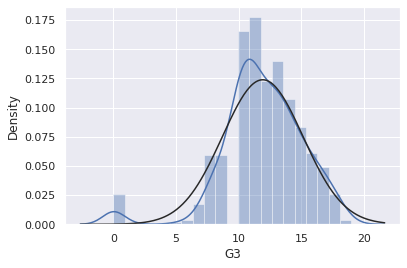

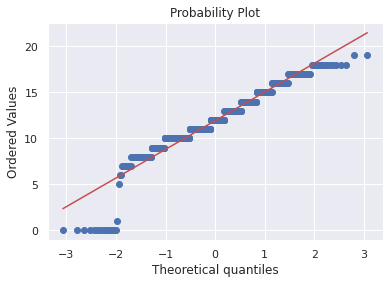

In [75]:
# Histograma y gráfico de probabilidad normal:

sns.distplot(df['G3'], fit = norm);
fig = plt.figure()
res = stats.probplot(df['G3'], plot = plt)

In [73]:
print("Skewness: %f" % df['G3'].skew())
print("Kurtosis: %f" % df['G3'].kurt())

Skewness: -0.918304
Kurtosis: 2.755800


Se puede apreciar una desviación con respecto a la distribución normal. Con respecto al gráfico y el coeficiente de asimetría de Fisher se puede decir que hay una asimetría negativa lo cual significa que habrá más valores ubicados hacia la izquierda de la media. La media también es menor que la mediana.
Tambien se evidencian algunos picos. Los rendimientos finales de los estudiantes en lengua portuguesa no se distribuyen de forma normal.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


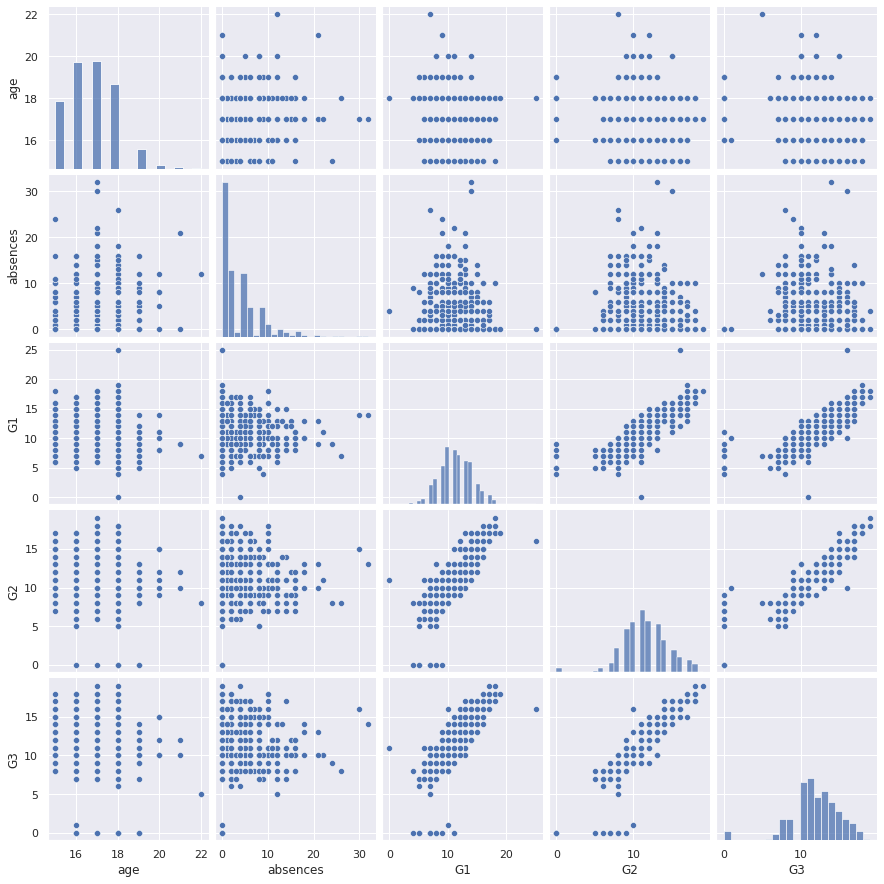

In [74]:
# Scatter plot:
sns.set()
cols = ['age', 'absences', 'G1', 'G2', 'G3']
sns.pairplot(df[cols], size = 2.5)
plt.show();

In [48]:
df.corr()

,age,absences,G1,G2,G3
age,1.000000,0.149998,-0.165638,-0.107119,-0.099568
absences,0.149998,1.000000,-0.148983,-0.124745,-0.033426
G1,-0.165638,-0.148983,1.000000,0.858552,0.776206
G2,-0.107119,-0.124745,0.858552,1.000000,0.862056
G3,-0.099568,-0.033426,0.776206,0.862056,1.000000


De acuerdo a las gráficas anteriores y a la matriz de correlación se puede decir que las ausencias y la edad no tienen una correlación lineal alta. En el caso de G1 y G2 correspondientes a las notas de primer y segundo corte están altamente correlacionadas porque G3 es la nota del último año, por lo cual, no se tendrán en cuenta como variables explicativas dentro del modelo. 

In [77]:
pip install funpymodeling==0.1.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 215 kB 40.9 MB/s 
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=0d56d33c17ae861c6a2e7d6e996082ae961e0859421a58e04a1b90a560ae8a1b
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


Diagrama de barras de la educación del padre

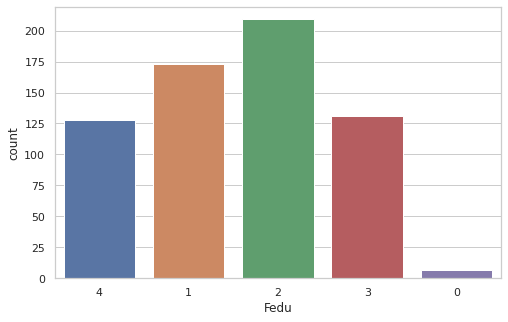

In [139]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.countplot(x= "Fedu",data=df)

Diagrama de barras de la educación de la madre

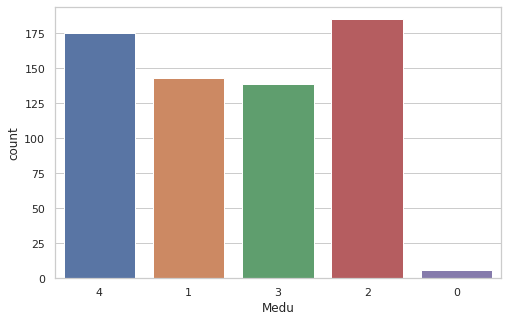

In [140]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.countplot(x= "Medu",data=df)

In [78]:
from funpymodeling.exploratory import freq_tbl

In [98]:
freq_tbl(df)

  school  frequency  percentage  cumulative_perc
0     GP        422    0.651235         0.651235
1     MS        226    0.348765         1.000000

----------------------------------------------------------------

  sex  frequency  percentage  cumulative_perc
0   F        382    0.589506         0.591331
1   M        264    0.407407         1.000000

----------------------------------------------------------------

  address  frequency  percentage  cumulative_perc
0       U        451    0.695988         0.695988
1       R        197    0.304012         1.000000

----------------------------------------------------------------

  famsize  frequency  percentage  cumulative_perc
0     GT3        454    0.700617         0.702786
1     LE3        192    0.296296         1.000000

----------------------------------------------------------------

  Pstatus  frequency  percentage  cumulative_perc
0       T        566    0.873457         0.876161
1       A         79    0.121914         0.9984

- De acuerdo a las tablas de frecuencias anteriormente presentadas se puede decir que hay una mayor cantidad de mujeres que de hombres. Además de ello hay una mayor cantidad de estudiantes que pertenecen al colegio  Gabriel Pereira que Mousinho da Silveira. Asi mismo, hay 451 estudiantes que viven en zona urbana y 197 en zona rural.

- En cuanto al nivel educativo de la madre el 28% de ellas tiene la eduación basica (5to a 9no grado), luego sigue el 27% con eduación superior.

- En cuanto al nivel educativo de la madre el 32% de ellos tiene la eduación basica (5to a 9no grado), luego sigue el 26% con eduación primaria.

- Ocupación de la madre, un 39% aproximadamente tienen un trabajo diferente a profesora, area de salud, area de servicios o ama de casa. 

- Ocupación del padre, un 56% aproxiadamente tienen un trabajo diferente a profesor, area de salud, area de servicios o trabajo en casa. Para ambos generos le sigue el area de servicios en porcentaje. Para la ocupación de la madre en un 20% y del padre un 27%.

- En cuanto al tiempo de estudio semanal el 47,06% de los estudiantes dedica solamente de  2 a 5 horas. El 32,56% dedica menos de dos horas.

- El apoyo educativo extra el 89,50% no tiene este tipo de clases fuera del colegio mientras que el 10,49% si los tiene. Si se mira las clases extra pagadas dentro de la materia del curso (matemáticas o portugués) el 62% si posee estas clases mientras que el 38% no.

- Acceso a Internet en casa: El 77% si tiene acceso mientras que el otro 23% no posee este servicio.


Variable respuesta en algunas categorias:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


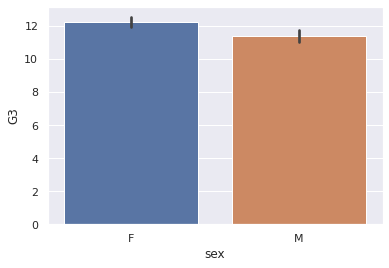

In [102]:
sns.barplot(df["sex"], df["G3"])
plt.show()

In [118]:
df.groupby("sex")["G3"].mean() 

sex
F    12.240838
M    11.409091
Name: G3, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


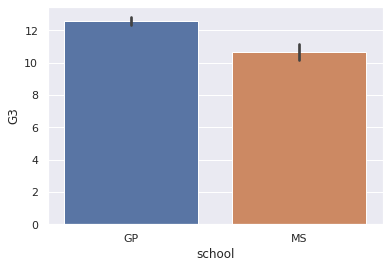

In [103]:
sns.barplot(df["school"], df["G3"])
plt.show()

In [120]:
df.groupby("school")["G3"].mean() 

school
GP    12.592417
MS    10.650442
Name: G3, dtype: float64

Las mujeres obtuvieron un mayor puntaje, sin embargo, esto tambien puede deberse a que hay una mejor cantidad de hombres que mujeres encuestados. Lo mismo ocurre con la insitución. La escuela GP tiene más estudiantes encuestados, por ende, tambien hay una mayor variedad entre sus puntajes.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


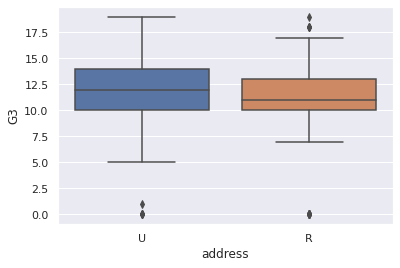

In [104]:
sns.boxplot(df["address"], df["G3"])
plt.show()

De acuerdo al boxplot anteriormente presentado para aquellos estudiantes que viven en zonas urbanas el 50% de ellos tienen un puntaje de 12 o menos. Mientras que aquellos que viven en zonas rurales el 50% de ellos tienen un puntaje de 11 o menos.

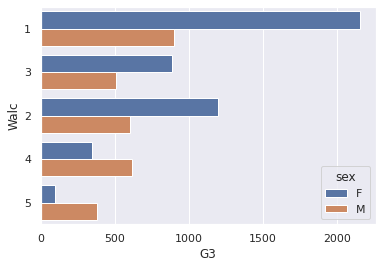

In [115]:
sns.barplot(data = df,
            estimator = sum,
            x = "G3", 
            y = "Walc",
            hue = "sex",
            ci = None)

Aquellos que tienen un consumo muy bajo (Nivel 1) de alcohol los fines de semana son quienes tuvieron los puntajes más altos en la nota final. Mientras que, quienes consumen alcohol muy frecuentemente (Nivel 4 y 5) son quienes tienen menores puntajes, siendo más los hombres que las mujeres.    

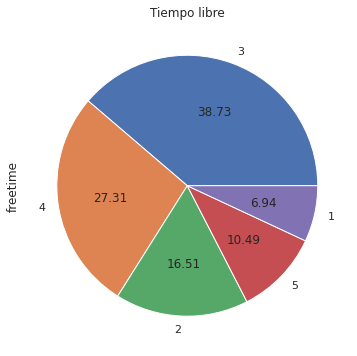

In [123]:
plot = df['freetime'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Tiempo libre')

La mayoria de los estudiantes tienen un tiempo libre fuera de la escuela en los niveles (3,4), teniendo en cuenta que 1 es lo más bajo y 5 lo más alto. 

In [121]:
df.groupby("Medu")["G3"].mean() 

Medu
0    11.666667
1    10.797203
2    11.691892
3    11.920863
4    13.068571
Name: G3, dtype: float64

In [122]:
df.groupby("Fedu")["G3"].mean() 

Fedu
0    12.142857
1    10.965318
2    11.784689
3    12.381679
4    12.921875
Name: G3, dtype: float64

Se puede evidenciar que aquellos estudiantes donde su padre o madre tienen niveles educativos altos (Nivel 2 y 4) son aquellos que tienen los mejores puntajes.

Tablas de contingencia

In [138]:
pd.crosstab(index=df['address'], columns=df['internet']
           ).apply(lambda r: r/r.sum() *100,
                                axis=0)    

internet,No,Yes
address,,
R,45.033113,25.955734
U,54.966887,74.044266


Hay un mayor porcentaje de invidividuos que no tienen internet en la zona urbana que en la zona rural.

In [135]:
pd.crosstab(index=df['studytime'], columns=df['freetime']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

freetime,1,2,3,4,5
studytime,,,,,
1,9.004739,18.957346,26.540284,27.962085,17.535545
2,6.885246,13.114754,44.262295,27.868852,7.868852
3,2.061856,18.556701,48.453608,27.835052,3.092784
4,8.571429,25.714286,37.142857,17.142857,11.428571


Aquellos que dedican un tiempo de estudio semanal menor a 2 horas, el 27.96% tienen tiempo libre alto (Nivel 4)
En cambio, aquellos que dedican un estudio semanal de 5 a 10 horas, el 3.09% tiene mucho tiempo libre.  

ANOVA

In [141]:
pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 26.0 MB/s 
     |████████████████████████████████| 285 kB 47.3 MB/s 
     |████████████████████████████████| 9.8 MB 50.5 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=2464baccd1610c5fbd689f02965fdbb2ec998dbe2a9ef855f29912e218c42641
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=8486f3a0880e899f78951f429e86e33d81390c749d091b40068829eff200cdcf
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled sta

In [142]:
import pingouin as pg

In [150]:
# Test de normalidad Shapiro-Wilk y Levene para homocesasticidad
# ==============================================================================
pg.normality(data=df, dv='G3', group='Medu')

,W,pval,normal
4,0.892816,6.399077e-10,False
1,0.894241,1.177269e-08,False
3,0.962079,6.759220e-04,False
2,0.891478,2.393689e-10,False
0,0.796891,5.509829e-02,True


In [152]:
pg.homoscedasticity(data=df, dv='G3', group='Medu', method='levene')

,W,pval,equal_var
levene,0.879414,0.475826,True


In [153]:
pg.normality(data=df, dv='G3', group='studytime')

,W,pval,normal
2,0.917028,5.926836e-12,False
3,0.969885,2.493930e-02,False
1,0.894324,4.895052e-11,False
4,0.955403,1.659385e-01,True


In [154]:
pg.homoscedasticity(data=df, dv='G3', group='studytime', method='levene')

,W,pval,equal_var
levene,1.061462,0.364841,True


In [157]:
pg.normality(data=df, dv='G3', group='Fedu')

,W,pval,normal
4,0.948794,1.043440e-04,False
1,0.909303,7.473181e-09,False
2,0.908676,4.941421e-10,False
3,0.950626,1.188572e-04,False
0,0.777292,2.424775e-02,False


In [156]:
pg.homoscedasticity(data=df, dv='G3', group='Fedu', method='levene')

,W,pval,equal_var
levene,1.616606,0.168346,True


In [158]:
pg.normality(data=df, dv='G3', group='failures')

,W,pval,normal
0,0.939247,3.644690e-14,False
3,0.780910,2.926172e-03,False
1,0.771863,4.582227e-09,False
2,0.898148,7.506800e-02,True


In [160]:
pg.homoscedasticity(data=df, dv='G3', group='failures', method='levene')

,W,pval,equal_var
levene,0.169257,0.917138,True


In [162]:
pg.normality(data=df, dv='G3', group='paid')

,W,pval,normal
No,0.925243,7.799229e-17,False
Yes,0.886751,9.402271e-04,False


In [161]:
pg.homoscedasticity(data=df, dv='G3', group='paid', method='levene')

,W,pval,equal_var
levene,1.563012,0.211677,True


In [163]:
pg.normality(data=df, dv='G3', group='Walc')

,W,pval,normal
1,0.935273,5.914774e-09,False
3,0.873666,1.094981e-08,False
2,0.945650,1.544772e-05,False
4,0.910986,1.764254e-05,False
5,0.920634,4.442344e-03,False


In [164]:
pg.homoscedasticity(data=df, dv='G3', group='Walc', method='levene')

,W,pval,equal_var
levene,1.169065,0.323251,True


In [166]:
pg.normality(data=df, dv='G3', group='freetime')

,W,pval,normal
3,0.920834,2.680454e-10,False
2,0.905505,1.299273e-06,False
4,0.936829,5.118955e-07,False
1,0.955980,8.577193e-02,True
5,0.902909,6.399465e-05,False


In [165]:
pg.homoscedasticity(data=df, dv='G3', group='freetime', method='levene')

,W,pval,equal_var
levene,1.432073,0.221731,True


In [167]:
pg.normality(data=df, dv='G3', group='address')

,W,pval,normal
U,0.947655,1.558382e-11,False
R,0.889031,6.698381e-11,False


In [168]:
pg.homoscedasticity(data=df, dv='G3', group='address', method='levene')

,W,pval,equal_var
levene,0.803342,0.37043,True


In [170]:
pg.normality(data=df, dv='G3', group='internet')

,W,pval,normal
No,0.885249,1.926505e-09,False
Yes,0.936933,1.167619e-13,False


In [169]:
pg.homoscedasticity(data=df, dv='G3', group='internet', method='levene')

,W,pval,equal_var
levene,0.070843,0.790198,True


Se sabe que para realizar un análisis confiable del resultado de un ANOVA y determinar cuales podrian llegar a ser las variables significativas en el modelo es necesario que el supuesto de normalidad y homocedasticidad se cumplan. Sin embargo ninguno de ellos pasa la prueba de normalidad.

Las hipótesis contrastadas en un ANOVA de un factor son:

H0 : No hay diferencias entre las medias de los diferentes grupos :  μ1=μ2...=μk=μ 

H1 : Al menos un par de medias son significativamente distintas la una de la otra.

In [173]:
pg.anova(data=df, dv='G3', between='Medu')

,Source,ddof1,ddof2,F,p-unc,np2
0,Medu,4,643,10.733369,1.994910e-08,0.062591


In [172]:
pg.anova(data=df, dv='G3', between='Fedu')

,Source,ddof1,ddof2,F,p-unc,np2
0,Fedu,4,643,7.980629,0.000003,0.047298


In [174]:
pg.anova(data=df, dv='G3', between='paid') ## No se seleccionaria

,Source,ddof1,ddof2,F,p-unc,np2
0,paid,1,646,2.014701,0.156264,0.003109


In [175]:
pg.anova(data=df, dv='G3', between='school')

,Source,ddof1,ddof2,F,p-unc,np2
0,school,1,646,58.083056,8.992271e-14,0.082495


In [176]:
pg.anova(data=df, dv='G3', between='address')

,Source,ddof1,ddof2,F,p-unc,np2
0,address,1,646,19.224518,0.000014,0.028899


In [177]:
pg.anova(data=df, dv='G3', between='sex')

,Source,ddof1,ddof2,F,p-unc,np2
0,sex,1,644,10.573808,0.001207,0.016154


In [178]:
pg.anova(data=df, dv='G3', between='Mjob')

,Source,ddof1,ddof2,F,p-unc,np2
0,Mjob,4,643,7.32938,0.000009,0.043607


In [179]:
pg.anova(data=df, dv='G3', between='Fjob') 

,Source,ddof1,ddof2,F,p-unc,np2
0,Fjob,4,642,3.253347,0.011758,0.019867


In [180]:
pg.anova(data=df, dv='G3', between='studytime')

,Source,ddof1,ddof2,F,p-unc,np2
0,studytime,3,644,15.522713,9.270214e-10,0.067435


In [181]:
pg.anova(data=df, dv='G3', between='freetime')

,Source,ddof1,ddof2,F,p-unc,np2
0,freetime,4,643,4.452374,0.001481,0.026951


In [182]:
pg.anova(data=df, dv='G3', between='failures')

,Source,ddof1,ddof2,F,p-unc,np2
0,failures,3,644,52.006517,4.145074e-30,0.19502


In [183]:
pg.anova(data=df, dv='G3', between='activities') # no se Seleccionaria

,Source,ddof1,ddof2,F,p-unc,np2
0,activities,1,646,2.123462,0.145544,0.003276


In [184]:
pg.anova(data=df, dv='G3', between='higher')

,Source,ddof1,ddof2,F,p-unc,np2
0,higher,1,645,80.884123,2.639982e-18,0.111428


In [185]:
pg.anova(data=df, dv='G3', between='Walc')

,Source,ddof1,ddof2,F,p-unc,np2
0,Walc,4,643,5.672043,0.000172,0.034082


In [186]:
pg.anova(data=df, dv='G3', between='internet')

,Source,ddof1,ddof2,F,p-unc,np2
0,internet,1,646,15.279836,0.000102,0.023106


In [187]:
pg.anova(data=df, dv='G3', between='schoolsup') #no se Seleccionaria

,Source,ddof1,ddof2,F,p-unc,np2
0,schoolsup,1,646,2.961336,0.085756,0.004563


In [188]:
pg.anova(data=df, dv='G3', between='health') #No se seleccionaria

,Source,ddof1,ddof2,F,p-unc,np2
0,health,4,643,2.328901,0.054849,0.014281


De acuerdo a los anteriores ANOVA donde se evidencia una diferencia o no de medias y por ende una influencia o no a nuestra variable respuesta G3 (Rendimiento lengua portuguesa ultimo corte) las variables elegidas serán:
 
 - Higher
 - Failures
 - Studytime
 - School
 - Medu

## Modelamiento Regresión lineal

3.	Seleccione un algoritmo de regresión clasificación según le corresponda (lineal, logístico o lasso o ridge) teniendo en cuenta lo siguiente:
o	Estime el modelo utilizando las variables previamente seleccionadas utilizando todo el dataset. Varíe 2 de los parámetros del modelo en 3 posibles valores para cada uno.


Como ya se realizo la selección de las variables, la única que presenta datos faltantes es "Higher" la cual procederemos a eliminarla.

In [14]:
indexNames = df[df["higher"].isnull() == True].index

In [15]:
df.drop(indexNames, inplace=True)
print(df)

    school sex  age address famsize Pstatus Medu Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A    4    4   at_home   teacher   
1       GP   F   17       U     GT3       T    1    1   at_home     other   
2       GP   F   15       U     LE3       T    1    1   at_home     other   
3       GP   F   15       U     GT3       T    4    2    health  services   
4       GP   F   16       U     GT3       T    3    3     other     other   
..     ...  ..  ...     ...     ...     ...  ...  ...       ...       ...   
644     MS   F   19       R     GT3       T    2    3  services     other   
645     MS   F   18       U     LE3       T    3    1   teacher  services   
646     MS   F   18       U     GT3       T    1    1     other     other   
647     MS   M   17       U     LE3       T    3    1  services  services   
648     MS   M   18       R     LE3       T    3    2  services     other   

     ... famrel freetime goout Dalc Walc health absences  G1  G2  G3  
0   

In [16]:
df.shape[0]

647

Transformación a variables dummy

In [17]:
df_nueva =  df.loc[:,["school", "Medu","higher", "failures", "studytime", "G3"]]; df_nueva

,school,Medu,higher,failures,studytime,G3
0,GP,4,yes,0,2,11
1,GP,1,yes,0,2,11
2,GP,1,yes,0,2,12
3,GP,4,yes,0,3,14
4,GP,3,yes,0,2,13
...,...,...,...,...,...,...
644,MS,2,yes,1,3,10
645,MS,3,yes,0,2,16
646,MS,1,yes,0,2,9
647,MS,3,yes,0,1,10


In [18]:
df_dummy = pd.get_dummies(df_nueva[["school", "Medu","higher", "failures", "studytime"]]); df_dummy


,school_GP,school_MS,Medu_0,Medu_1,Medu_2,Medu_3,Medu_4,higher_no,higher_yes,failures_0,failures_1,failures_2,failures_3,studytime_1,studytime_2,studytime_3,studytime_4
0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0
1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0
2,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
645,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0
646,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0
647,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0


Definir X y Y

In [19]:
X = df_dummy.drop(['school_GP', 'Medu_0', 'studytime_1','higher_no', 'failures_0' ], axis=1); X

,school_MS,Medu_1,Medu_2,Medu_3,Medu_4,higher_yes,failures_1,failures_2,failures_3,studytime_2,studytime_3,studytime_4
0,0,0,0,0,1,1,0,0,0,1,0,0
1,0,1,0,0,0,1,0,0,0,1,0,0
2,0,1,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,1,1,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,1,0,0,1,1,0,0,0,1,0
645,1,0,0,1,0,1,0,0,0,1,0,0
646,1,1,0,0,0,1,0,0,0,1,0,0
647,1,0,0,1,0,1,0,0,0,0,0,0


In [20]:
y = df_nueva.loc[:,["G3"]];y

,G3
0,11
1,11
2,12
3,14
4,13
...,...
644,10
645,16
646,9
647,10


Ajustar modelo de regresión

In [95]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

Examinar los coeficientes

In [96]:
print(linreg.coef_)

[[-1.1732071  -0.51981218 -0.43929703 -0.33987734  0.17344703  1.68437939
  -2.90702722 -2.83045433 -3.1999759   0.55627884  1.39553455  1.15509427]]


In [97]:
y_pred = linreg.predict(X)

In [98]:
# calculate RMSE
from sklearn import metrics
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('R2:', metrics.r2_score(y, y_pred))

RMSE:  2.6772926373170725
R2: 0.309014995677488


**¿Cómo elegir entre la regresión Lasso y la regresión Ridge?**

- La regresión Lasso es preferible si creemos que muchas características son irrelevantes o si preferimos un modelo disperso.
- Si el rendimiento del modelo es su principal preocupación, es mejor probar ambos.
- La regresión de ElasticNet es una combinación de la regresión lasso y la regresión ridge.

De acuerdo a la información anterior se eligió Ridge L2

Varíe 2 de los parámetros del modelo en 3 posibles valores para cada uno:

In [99]:
from sklearn.linear_model import Ridge
# try alpha=0.1 y tol = 0.004
ridgereg_1 = Ridge(alpha=0.1, tol = 0.004)
ridgereg_1.fit(X, y)
y_pred_1 = ridgereg_1.predict(X)
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y, y_pred_1)))
print('R2:', metrics.r2_score(y, y_pred_1))

RMSE:  2.6772978775169745
R2: 0.309012290778483


In [26]:
print(ridgereg_1.coef_)

[[-1.17292615 -0.50102332 -0.4187722  -0.32031873  0.19441225  1.68675087
  -2.9008736  -2.80863713 -3.17533802  0.55474666  1.39358168  1.15154894]]


In [100]:
# alpha= 0.03 y tol = 0.002
ridgereg_2 = Ridge(alpha= 0.03, tol = 0.002)
ridgereg_2.fit(X, y)
y_pred_2 = ridgereg_2.predict(X)
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y, y_pred_2)))
print('R2:', metrics.r2_score(y, y_pred_2))

RMSE:  2.677293118925567
R2: 0.3090147470798764


In [28]:
print(ridgereg_2.coef_)

[[-1.17312105 -0.51389322 -0.43285424 -0.33372612  0.18002211  1.68509918
  -2.90517885 -2.8238589  -3.19254649  0.55581323  1.39494552  1.15402398]]


In [101]:
# alpha= 2 y tol = 0.05
ridgereg_3 = Ridge(alpha= 2, tol = 0.05)
ridgereg_3.fit(X, y)
y_pred_3 = ridgereg_3.predict(X)
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y, y_pred_3)))
print('R2:', metrics.r2_score(y, y_pred_3))

RMSE:  2.678774070475044
R2: 0.3082500951270606


In [30]:
print(ridgereg_3.coef_)

[[-1.16887507 -0.36264567 -0.25164173 -0.168612    0.36950309  1.71934172
  -2.79074445 -2.45938074 -2.77006827  0.53097932  1.35920307  1.09049801]]


-	Estime el modelo utilizando únicamente una partición de entrenamiento (80%) and test (20%). Varíe 2 de los parámetros del modelo en 3 posibles valores para cada uno.

Separar datos de entrenamiento y testeo: 

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(517, 12) (130, 12) (517, 1) (130, 1)


Ajustar el modelo de regresión:

In [32]:
linreg_1 = LinearRegression()
linreg_1.fit(X_train, y_train)

LinearRegression()

Examinar coeficientes:

In [33]:
print(linreg_1.coef_)

[[-0.87684511 -0.93590278 -0.59046434 -0.67611695  0.08323843  1.62227477
  -2.71178908 -2.74915037 -2.99100485  0.51745454  1.18669367  0.87406904]]


Predicciones:

In [34]:
y_pred_4 = linreg.predict(X_test)

In [91]:
# Metricas
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred_4)))
print('R2:', metrics.r2_score(y_test, y_pred_4))

RMSE:  2.8332776223525102
R2: 0.3813230090980658


Haciendo uso de Ridge:

In [90]:
# alpha=0.1 y tol = 0.004
ridgereg_4 = Ridge(alpha=0.1, tol = 0.004)
ridgereg_4.fit(X_train, y_train)
y_pred_5 = ridgereg_4.predict(X_test)
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_5)))
print('R2:', metrics.r2_score(y_test, y_pred_5))

RMSE:  2.907392536952576
R2: 0.3485320659319533


In [37]:
print(ridgereg_4.coef_)

[[-0.87666757 -0.89450602 -0.54741098 -0.63414486  0.12684854  1.62499306
  -2.7045195  -2.72481638 -2.96399061  0.51540024  1.18455813  0.8706824 ]]


In [89]:
# alpha= 0.03 y tol = 0.002
ridgereg_5 = Ridge(alpha= 0.03, tol = 0.002)
ridgereg_5.fit(X_train, y_train)
y_pred_6 = ridgereg_5.predict(X_test)
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_6)))
print('R2:', metrics.r2_score(y_test, y_pred_6))

RMSE:  2.9070225776894345
R2: 0.3486978510878074


In [39]:
print(ridgereg_5.coef_)

[[-0.87679002 -0.92276668 -0.57682677 -0.66280606  0.09704355  1.62310023
  -2.70960777 -2.74176592 -2.98285509  0.51682598  1.18604865  0.87303948]]


In [88]:
# alpha= 2 y tol = 0.05
ridgereg_6 = Ridge(alpha= 2, tol = 0.05)
ridgereg_6.fit(X_train, y_train)
y_pred_7 = ridgereg_6.predict(X_test)
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred_7)))
print('R2:', metrics.r2_score(y_test, y_pred_7))

RMSE:  2.91945866177226
R2: 0.3431134615640634


In [41]:
print(ridgereg_6.coef_)

[[-0.87456045 -0.60902269 -0.23590465 -0.3393656   0.44773664  1.66097211
  -2.57449113 -2.35418286 -2.52815644  0.48623948  1.14749577  0.81670788]]


-	Estime el modelo, utilizando la partición anterior, pero en la partición de entrenamiento utilizar un K Fold Cross Validation (k=5 y k=10).

Regresión lineal múltiple:

In [42]:
clf1_tt = LinearRegression()

In [43]:
clf1_tt.fit(X_train,y_train)

LinearRegression()

In [44]:
# Crear el metodo K fold CV  K = 5
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=666, shuffle=True)

In [82]:
# Estimar el modelo en cada uno de los k folds
from sklearn.model_selection import cross_val_score
scores_1 = cross_val_score(clf1_tt, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
r_1 = cross_val_score(clf1_tt, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)

In [83]:
print('RMSE regresión:', np.sqrt(abs(np.mean(scores_1))))
print('R2 regresión:', (abs(np.mean(r_1))))

RMSE regresión: 2.6808503636782994
R2 regresión: 0.2619699759012932


In [80]:
# Estimar el modelo en cada uno de los k folds K = 10
cv_2 = KFold(n_splits=10, random_state=666, shuffle=True)
scores_2 = cross_val_score(clf1_tt, X_train, y_train, scoring='neg_mean_squared_error', cv=cv_2, n_jobs=-1)
r_2 = cross_val_score(clf1_tt, X_train, y_train, scoring='r2', cv=cv_2, n_jobs=-1)

In [81]:
print('RMSE regresión:', np.sqrt(abs(np.mean(scores_2))))
print('R2 regresión:', (abs(np.mean(r_2))))

RMSE regresión: 2.687523211782221
R2 regresión: 0.2507784481484993


Utilizando Ridge con K = 5

In [78]:
# alpha=0.1 y tol = 0.004
# Estimar el modelo en cada uno de los k folds K = 5
scores_3 = cross_val_score(ridgereg_4, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
r_3 = cross_val_score(ridgereg_4, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)

In [79]:
print('RMSE regresión:', np.sqrt(abs(np.mean(scores_3))))
print('R2 regresión:', (abs(np.mean(r_3))))

RMSE regresión: 2.680477957142444
R2 regresión: 0.2621960601579042


In [76]:
# alpha= 0.03 y tol = 0.002
# Estimar el modelo en cada uno de los k folds K = 5
scores_4 = cross_val_score(ridgereg_5, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
r_4 = cross_val_score(ridgereg_5, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)

In [77]:
print('RMSE regresión:', np.sqrt(abs(np.mean(scores_4))))
print('R2 regresión:', (abs(np.mean(r_4))))

RMSE regresión: 2.6807259095629576
R2 regresión: 0.26204529621317885


In [74]:
# alpha= 2 y tol = 0.05
# Estimar el modelo en cada uno de los k folds K = 5
scores_5 = cross_val_score(ridgereg_6, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
r_5 = cross_val_score(ridgereg_6, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)

In [75]:
print('RMSE regresión:', np.sqrt(abs(np.mean(scores_5))))
print('R2 regresión:', (abs(np.mean(r_5))))

RMSE regresión: 2.681022896339227
R2 regresión: 0.26205405287802463


Utilizando Ridge con K = 10

In [73]:
# alpha=0.1 y tol = 0.004
# Estimar el modelo en cada uno de los k folds K = 10
scores_6 = cross_val_score(ridgereg_4, X_train, y_train, scoring='neg_mean_squared_error', cv=cv_2, n_jobs=-1)
r_6 = cross_val_score(ridgereg_4, X_train, y_train, scoring='r2', cv=cv_2, n_jobs=-1)
print('RMSE regresión:', np.sqrt(abs(np.mean(scores_6))))
print('R2 regresión:', (abs(np.mean(r_6))))

RMSE regresión: 2.687260345186239
R2 regresión: 0.2509549435506454


In [72]:
# alpha= 0.03 y tol = 0.002
# Estimar el modelo en cada uno de los k folds K = 10
scores_7 = cross_val_score(ridgereg_5, X_train, y_train, scoring='neg_mean_squared_error', cv=cv_2, n_jobs=-1)
r_7 = cross_val_score(ridgereg_5, X_train, y_train, scoring='r2', cv=cv_2, n_jobs=-1)
print('RMSE regresión:', np.sqrt(abs(np.mean(scores_7))))
print('R2 regresión:', (abs(np.mean(r_7))))

RMSE regresión: 2.6874382575081524
R2 regresión: 0.2508346861710556


In [69]:
# alpha= 2 y tol = 0.05
# Estimar el modelo en cada uno de los k folds K = 5
scores_8 = cross_val_score(ridgereg_6, X_train, y_train, scoring='neg_mean_squared_error', cv=cv_2, n_jobs=-1)
r_8 = cross_val_score(ridgereg_6, X_train, y_train, scoring='r2', cv=cv_2, n_jobs=-1)
print('RMSE regresión:', np.sqrt(abs(np.mean(scores_8))))
print('R2 regresión:', (abs(np.mean(r_8))))

RMSE regresión: 2.6867813541883674
R2 regresión: 0.251791169390371


Seleccionar dos métricas y evaluar los modelos teniendo en cuenta que el resultado a presentar y analizar será en la partición de test.

Las métricas seleccionadas fueron R2 y RMSE

4.	Analice:

- ¿Cuál fue el mejor modelo según las métricas anteriormente mencionadas?
- 	De la respuesta anterior ¿Qué valores de los parámetros se seleccionaron para lograr dicho resultado?
- Analice los coeficientes del modelo final seleccionado


Según RMSE

Solo se tomo en cuenta las métricas que tuvieron presente un grupo de entrenamiento y un grupo de testeo.

In [106]:
RMSE = [np.sqrt(abs(np.mean(scores_1))), np.sqrt(abs(np.mean(scores_2))), np.sqrt(abs(np.mean(scores_3))), np.sqrt(abs(np.mean(scores_4))), np.sqrt(abs(np.mean(scores_5))), 
        np.sqrt(abs(np.mean(scores_6))), np.sqrt(abs(np.mean(scores_7))), np.sqrt(abs(np.mean(scores_8))), np.sqrt(metrics.mean_squared_error(y_test, y_pred_4)), 
        np.sqrt(metrics.mean_squared_error(y_test, y_pred_5)), np.sqrt(metrics.mean_squared_error(y_test, y_pred_6)), np.sqrt(metrics.mean_squared_error(y_test, y_pred_7))]

In [109]:
RMSE

[2.6808503636782994,
 2.687523211782221,
 2.680477957142444,
 2.6807259095629576,
 2.681022896339227,
 2.687260345186239,
 2.6874382575081524,
 2.6867813541883674,
 2.8332776223525102,
 2.907392536952576,
 2.9070225776894345,
 2.91945866177226]

In [110]:
min(RMSE) #El cual es scores_3

2.680477957142444

El modelo seleccionado de acuerdo a la métrica RMSE es utilizando un Kfolds = 5 y una variación de Ridge con Alpha=0.1 y tol = 0.004.

Según R cuadrado:

In [111]:
R2 = [(abs(np.mean(r_1))), (abs(np.mean(r_2))), (abs(np.mean(r_3))), (abs(np.mean(r_4))), (abs(np.mean(r_5))), (abs(np.mean(r_6))), (abs(np.mean(r_7))), (abs(np.mean(r_8))),
      metrics.r2_score(y_test, y_pred_4), metrics.r2_score(y_test, y_pred_5),metrics.r2_score(y_test, y_pred_6), metrics.r2_score(y_test, y_pred_7)]

In [112]:
R2

[0.2619699759012932,
 0.2507784481484993,
 0.2621960601579042,
 0.26204529621317885,
 0.26205405287802463,
 0.2509549435506454,
 0.2508346861710556,
 0.251791169390371,
 0.3813230090980658,
 0.3485320659319533,
 0.3486978510878074,
 0.3431134615640634]

In [113]:
min(R2) 

0.2507784481484993

El modelo seleccionado según R2 es utilizando un Kfolds = 10 sin ninguna variación en su regresión. Utilizando la regresión lineal multiple normal. Sin embargo, la métrica que representa mejor los errores termina siendo el RMSE, por esta razón el modelo que se seleccionará será el anterior utilizando un Kfolds = 5 y una variación de Ridge con Alpha=0.1 y tol = 0.004.

In [114]:
# Coeficientes del modelo final
# alpha=0.1 y tol = 0.004
# Estimar el modelo en cada uno de los k folds K = 5
scores_3 = cross_val_score(ridgereg_4, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
r_3 = cross_val_score(ridgereg_4, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)

In [115]:
print('RMSE regresión:', np.sqrt(abs(np.mean(scores_3))))
print('R2 regresión:', (abs(np.mean(r_3))))

RMSE regresión: 2.680477957142444
R2 regresión: 0.2621960601579042


In [117]:
X

,school_MS,Medu_1,Medu_2,Medu_3,Medu_4,higher_yes,failures_1,failures_2,failures_3,studytime_2,studytime_3,studytime_4
0,0,0,0,0,1,1,0,0,0,1,0,0
1,0,1,0,0,0,1,0,0,0,1,0,0
2,0,1,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,1,1,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,1,0,0,1,1,0,0,0,1,0
645,1,0,0,1,0,1,0,0,0,1,0,0
646,1,1,0,0,0,1,0,0,0,1,0,0
647,1,0,0,1,0,1,0,0,0,0,0,0


In [116]:
print(ridgereg_4.coef_)

[[-0.87666757 -0.89450602 -0.54741098 -0.63414486  0.12684854  1.62499306
  -2.7045195  -2.72481638 -2.96399061  0.51540024  1.18455813  0.8706824 ]]


In [118]:
print(ridgereg_4.intercept_)

[11.21665992]


Interpretación:

11.21665992 - 0.87666757(1) - 0.89450602(0)- 0.54741098(0) - 0.63414486(0) + 0.12684854(1) + 1.62499306(1) - 2.7045195(1) - 2.72481638(0) - 2.96399061(0) + 0.51540024(0) +  1.18455813(1) + 0.8706824(0) = G3_pred

In [125]:
11.21665992 - 0.87666757*(0) - 0.89450602*(0)- 0.54741098*(0) - 0.63414486*(0) + 0.12684854*(1) + 1.62499306*(1) - 2.7045195*(0) - 2.72481638*(0) - 2.96399061*(0) + 0.51540024*(0) +  1.18455813*(1) + 0.8706824*(0) 

14.15305965

 - School = (binaria: "GP" (1) - Gabriel Pereira or "MS" (0) - Mousinho da Silveira)

 - Medu = Educación de la madre (numérico: 0 - ninguno, 1 - educación primaria (4to grado), 2 - 5to a 9no grado, 3 - educación secundaria o 4 - educación superior)

 - Higher = Quiere cursar estudios superiores (binario: sí o no) (1) "Si" (0) "No"

 - Failures =  Número de fallas de clase pasadas (numérico: n si 1<=n<3, si no 4)

 - Studytime = Tiempo de estudio semanal (numérico: 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, o 4 - >10 horas)

Por ejemplo, para un individuo que pertenece a la escuela MS donde el nivel educativo de la madre es 4 (Educación superior), si quiere cursar estudios superiores, su número de fallas de clases pasadas es cero y su tiempo de estudio semanal se encuentra de 5 a 10 horas se puede decir que su rendimiento en lengua portuguesa para la nota final será igual a 14 de 20 puntos aproximadamente.